In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [17]:
psqi_df = pd.read_excel('./최종 데이터 그래프그리기용_8주전 후 결합.xlsx') 
print(psqi_df)

      Sample_ID GROUP  COHORT SEX  AGE Insulin  CRP   WBC  Neutrophil   Lym  \
0         S0001   SMI       2   M   60     7.7  0.2  3.91        49.9  39.9   
1         S0002   SMI       2   M   61     5.4  0.2  5.51        63.9  26.3   
2         S0003   SMI       2   F   52     5.1  0.7  4.85        50.8  38.1   
3         S0004   SMI       2   F   41     4.2  0.6  6.14        59.2  33.4   
4         S0005   SMI       2   F   41     3.2  0.1  4.93        47.9  43.6   
..          ...   ...     ...  ..  ...     ...  ...   ...         ...   ...   
771  MetS_S0280  MetS       1   F   24     NaN  NaN   NaN         NaN   NaN   
772  MetS_S0281  MetS       1   F   44     NaN  NaN   NaN         NaN   NaN   
773  MetS_S0282  MetS       1   F   37     NaN  NaN   NaN         NaN   NaN   
774  MetS_S0283  MetS       1   M   51     NaN  NaN   NaN         NaN   NaN   
775  MetS_S0284  MetS       1   F   42     NaN  NaN   NaN         NaN   NaN   

     ...  PSQI_Q5e  PSQI_Q5f  PSQI_Q5g  PSQI_Q5h  P

In [18]:
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,Insulin,CRP,WBC,Neutrophil,Lym,...,PSQI_Q5e,PSQI_Q5f,PSQI_Q5g,PSQI_Q5h,PSQI_Q5i,PSQI_Q5j,PSQI_Q6,PSQI_Q7,PSQI_Q8,PSQI_Q9
0,S0001,SMI,2,M,60,7.7,0.2,3.91,49.9,39.9,...,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,2.0,1.0
1,S0002,SMI,2,M,61,5.4,0.2,5.51,63.9,26.3,...,3.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0
2,S0003,SMI,2,F,52,5.1,0.7,4.85,50.8,38.1,...,3.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
3,S0004,SMI,2,F,41,4.2,0.6,6.14,59.2,33.4,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,1.0
4,S0005,SMI,2,F,41,3.2,0.1,4.93,47.9,43.6,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,MetS_S0280,MetS,1,F,24,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,MetS_S0281,MetS,1,F,44,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,MetS_S0282,MetS,1,F,37,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,MetS_S0283,MetS,1,M,51,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,Insulin,CRP,WBC,Neutrophil,Lym,...,PSQI_Q5e,PSQI_Q5f,PSQI_Q5g,PSQI_Q5h,PSQI_Q5i,PSQI_Q5j,PSQI_Q6,PSQI_Q7,PSQI_Q8,PSQI_Q9
0,S0001,SMI,2,M,60,7.7,0.2,3.91,49.9,39.9,...,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,2.0,1.0
1,S0002,SMI,2,M,61,5.4,0.2,5.51,63.9,26.3,...,3.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0
2,S0003,SMI,2,F,52,5.1,0.7,4.85,50.8,38.1,...,3.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
3,S0004,SMI,2,F,41,4.2,0.6,6.14,59.2,33.4,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,1.0
4,S0005,SMI,2,F,41,3.2,0.1,4.93,47.9,43.6,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,MetS_S0280,MetS,1,F,24,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,MetS_S0281,MetS,1,F,44,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,MetS_S0282,MetS,1,F,37,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,MetS_S0283,MetS,1,M,51,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df.isnull().sum()
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [21]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1 if x=='M' else 0)

In [22]:
psqi_df["Insulin"] = psqi_df["Insulin"].apply(lambda x: 0.1 if x=='<0.2' else 0 if x=='<0.1' else x)

psqi_df["PSQI_TOTAL"] = psqi_df["PSQI_TOTAL"].apply(lambda x: 0 if x<6 else 1)

In [23]:
#<150 (정상) : 0 -> 중간 값인 80으로 조정
#한단계씩 상향 조정
#150~199 (약간 높음 - 체중감량과 운동요법) : 1 -> 80~150 (정상)
#200~499 (높음 - 생활요법과 함께 약물치료 고려) : 2 -> 150~199 (약간 높음)
#>500 (아주 높음 - 즉시 약물치료) : 3 한명도 해당 X -> 200~ (높음~아주높음)

psqi_df["TG"] = psqi_df["TG"].apply(lambda x: 0 if x<80 else 1 if 80<=x<150 else 2 if 150<=x<200 else 3)

In [24]:
psqi_df

,SEX,AGE,Insulin,CRP,WBC,Neutrophil,Lym,GLU0,Creatinine,AST,...,PSQI_Q5e,PSQI_Q5f,PSQI_Q5g,PSQI_Q5h,PSQI_Q5i,PSQI_Q5j,PSQI_Q6,PSQI_Q7,PSQI_Q8,PSQI_Q9
0,1,35,5.57,<0.1,5.82,54.6,35.0,89.0,0.91,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,1,46,7.35,0.7,5.46,44.3,43.7,90.0,0.75,31.0,...,3.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,1,45,4.33,0.6,4.99,51.7,36.0,103.0,0.81,23.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0
3,1,32,9.26,0.4,3.99,51.0,37.8,96.0,1.10,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,33,3.52,<0.1,5.84,39.1,42.1,81.0,0.85,25.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0,63,1.80,0.3,3.89,38.4,51.9,93.0,0.75,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
481,1,57,20.40,6.2,4.66,57.5,30.7,106.0,0.73,37.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
482,0,35,5.10,0.3,7.75,60.7,30.5,91.0,0.71,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
483,0,61,9.30,0.2,4.35,45.1,40.7,99.0,0.73,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [25]:
psqi_cut_tg=psqi_df[['TG']]
psqi_cut_tg

,TG
0,1
1,1
2,0
3,0
4,0
...,...
480,0
481,0
482,1
483,0


In [26]:
psqi_cut_tg['TG'].value_counts()

0    219
1    195
3     37
2     34
Name: TG, dtype: int64

In [27]:
psqi_df.drop('TG', axis=1, inplace=True)

In [28]:
psqi_df_cut_1=psqi_df.iloc[:,:5]
psqi_df_cut_2=psqi_df.iloc[:,5:10]
psqi_df_cut_3=psqi_df.iloc[:,10:15]
psqi_df_cut_4=psqi_df.iloc[:,15:20]
psqi_df_cut_5=psqi_df.iloc[:,20:25]
psqi_df_cut_6=psqi_df.iloc[:,25:30]
psqi_df_cut_7=psqi_df.iloc[:,30:35]
psqi_df_cut_8=psqi_df.iloc[:,35:40]
psqi_df_cut_9=psqi_df.iloc[:,40:45]
psqi_df_cut_10=psqi_df.iloc[:,45:]

psqi_df_cut_1=pd.concat([psqi_df_cut_1, psqi_cut_tg], axis=1)
psqi_df_cut_2=pd.concat([psqi_df_cut_2, psqi_cut_tg], axis=1)
psqi_df_cut_3=pd.concat([psqi_df_cut_3, psqi_cut_tg], axis=1)
psqi_df_cut_4=pd.concat([psqi_df_cut_4, psqi_cut_tg], axis=1)
psqi_df_cut_5=pd.concat([psqi_df_cut_5, psqi_cut_tg], axis=1)
psqi_df_cut_6=pd.concat([psqi_df_cut_6, psqi_cut_tg], axis=1)
psqi_df_cut_7=pd.concat([psqi_df_cut_7, psqi_cut_tg], axis=1)
psqi_df_cut_8=pd.concat([psqi_df_cut_8, psqi_cut_tg], axis=1)
psqi_df_cut_9=pd.concat([psqi_df_cut_9, psqi_cut_tg], axis=1)
psqi_df_cut_10=pd.concat([psqi_df_cut_10, psqi_cut_tg], axis=1)

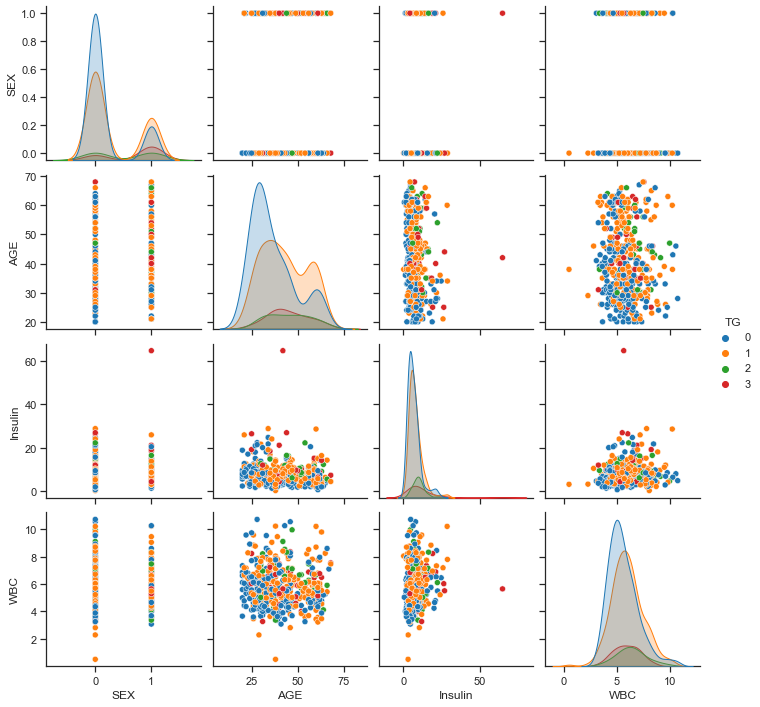

In [29]:
sns.pairplot(psqi_df_cut_1, hue="TG", palette='tab10')
plt.show()

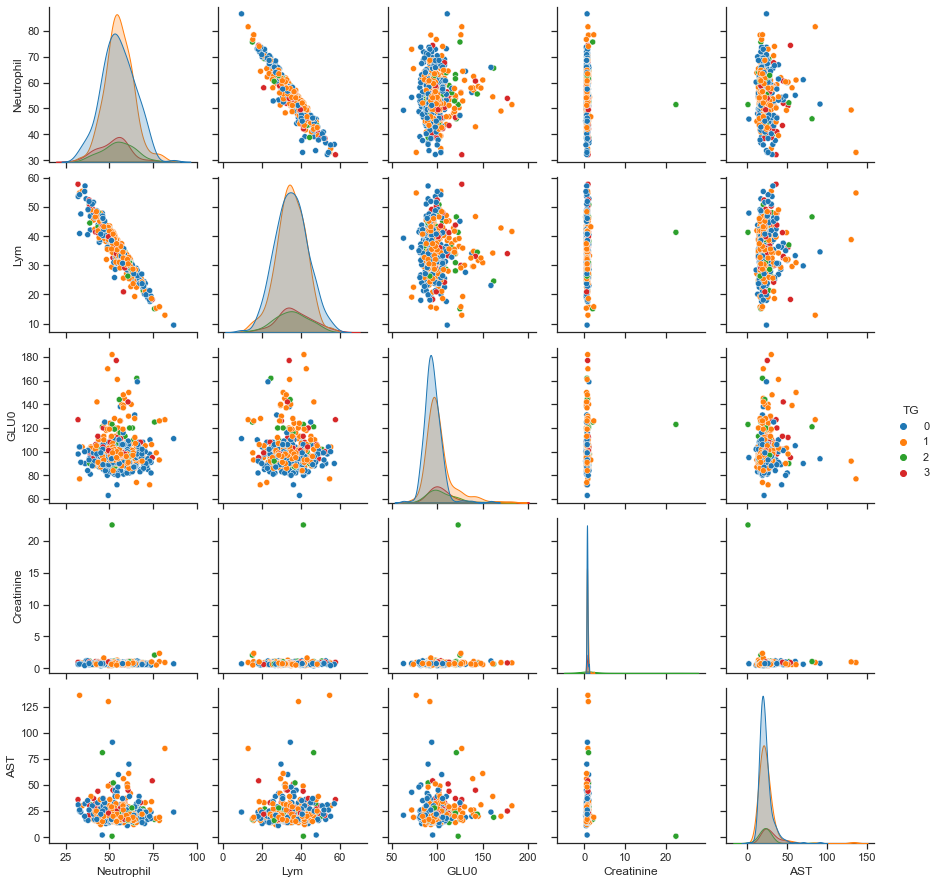

In [30]:
sns.pairplot(psqi_df_cut_2, hue="TG", palette="tab10")
plt.show()

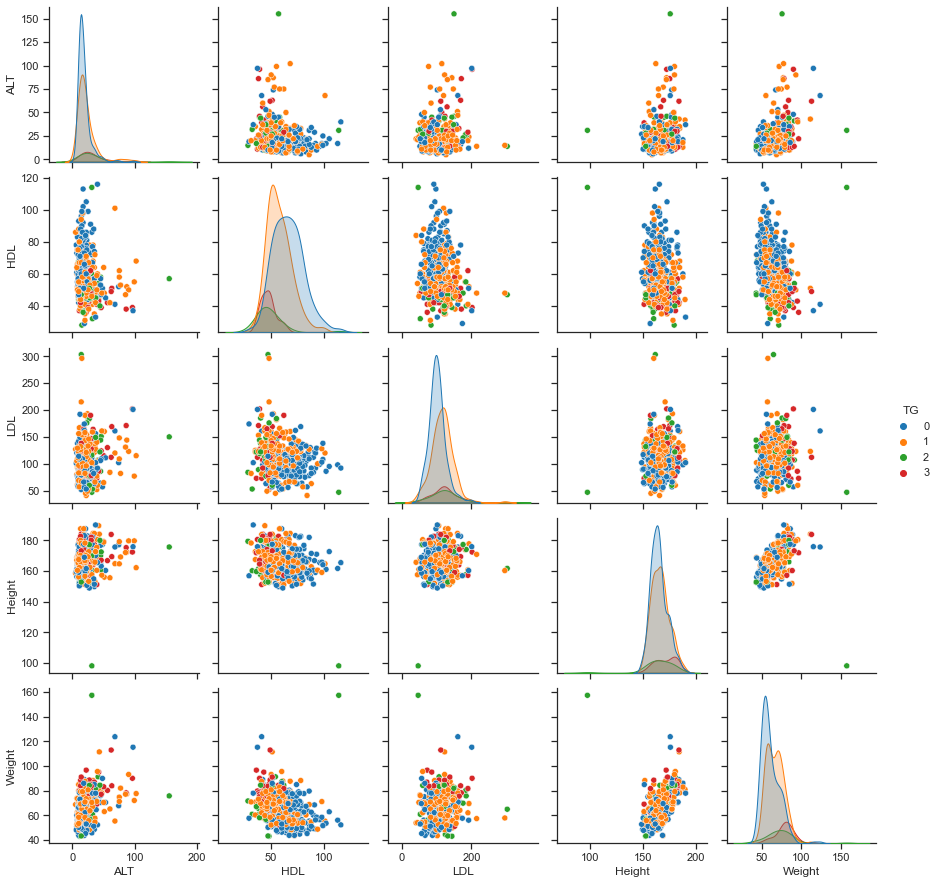

In [31]:
sns.pairplot(psqi_df_cut_3, hue="TG", palette='tab10')
plt.show()

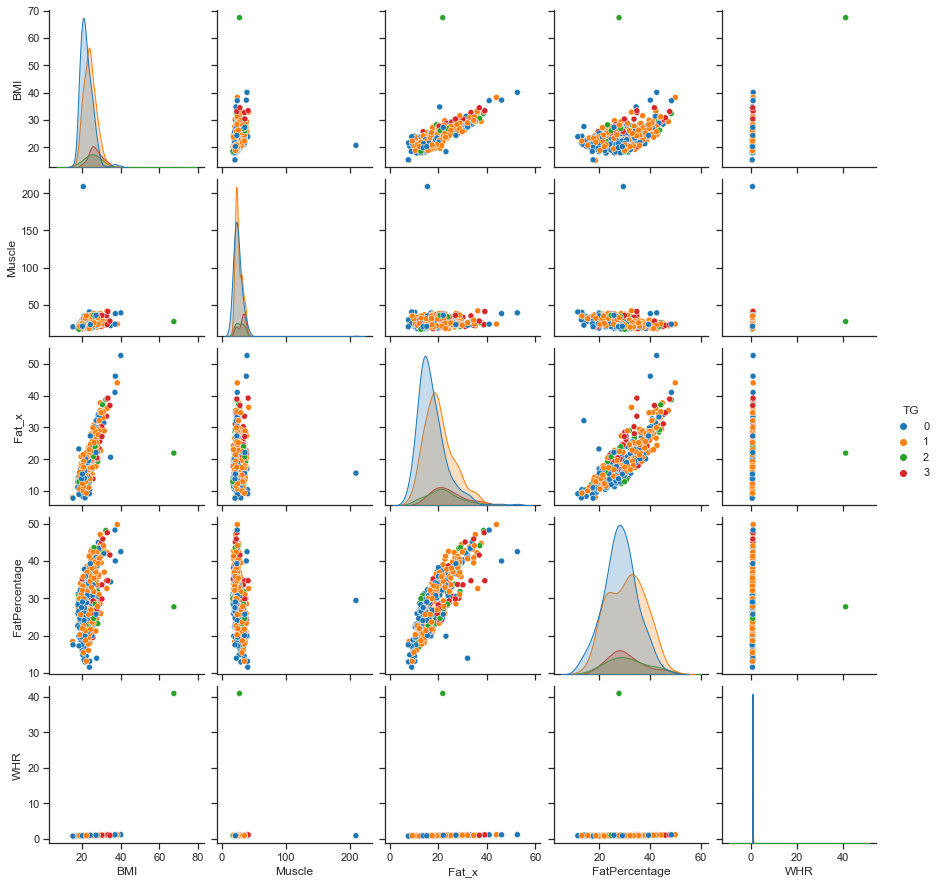

In [32]:
sns.pairplot(psqi_df_cut_4, hue="TG", palette='tab10')
plt.show()

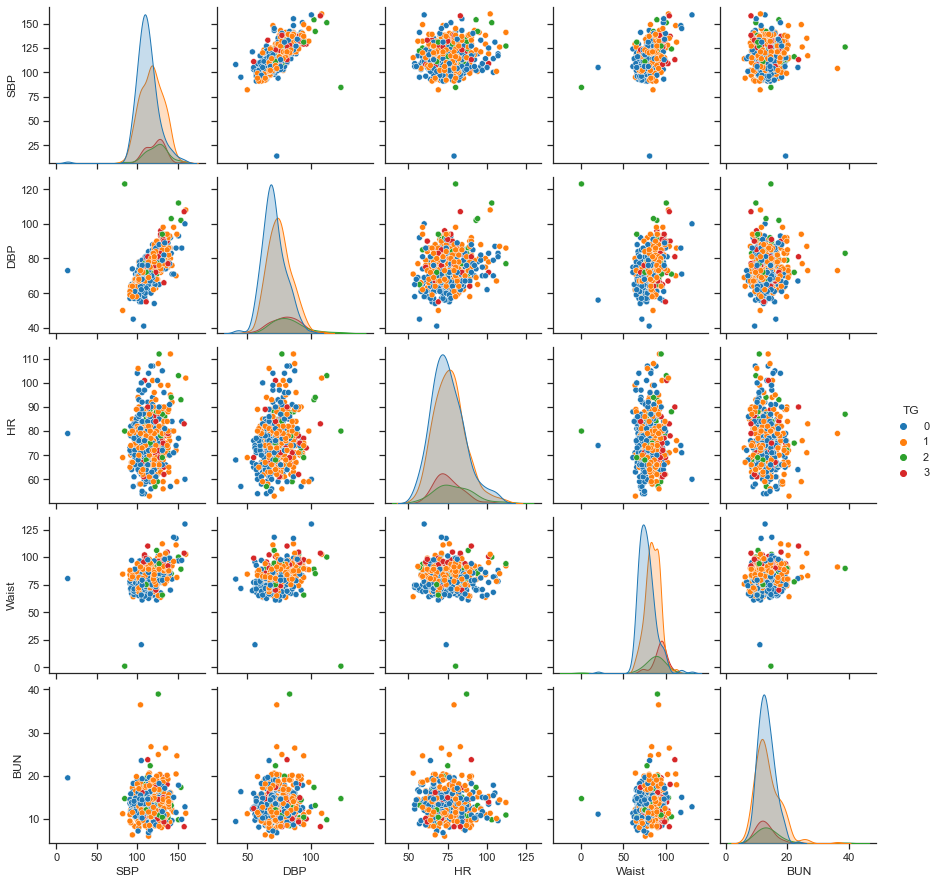

In [33]:
sns.pairplot(psqi_df_cut_5, hue="TG", palette='tab10')
plt.show()

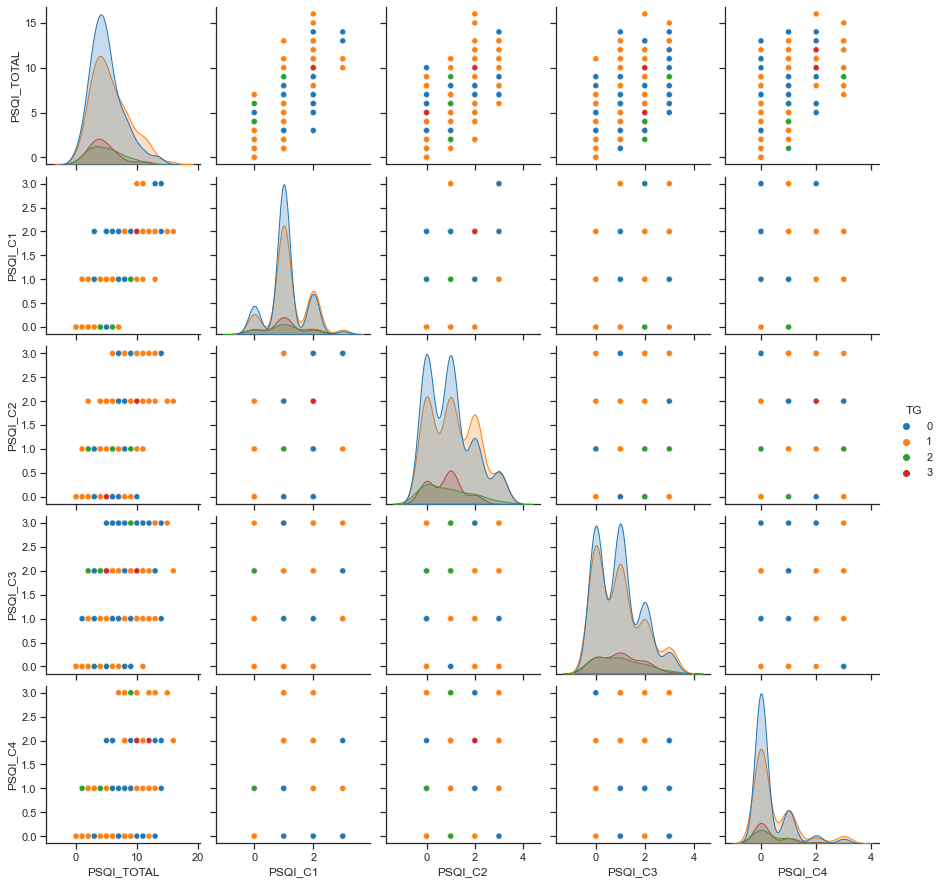

In [34]:
sns.pairplot(psqi_df_cut_6, hue="TG", palette='tab10')
plt.show()